### plant disease prediction


# importing data


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import tensorflow as tf
print(tf.__version__)


2.18.0


# data preprocessing

## train image preprocessing


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',   #directory name
    labels="inferred",   #directory name is same as label name
    label_mode="categorical",   # more than 2 classes
    class_names=None,   # no class name
    color_mode="rgb",
    batch_size=32,   # default batch size means at a time 32 images will be feeded to the NN
    image_size=(128, 128),
    shuffle=True,  #shuffle data to reduce bias of model, will randomly train to learn better
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


# validation image preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [11]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [13]:
for x,y in training_set : #FOR A BATCH OF 32
    print(x,x.shape)      # x image , x.shape (batch_size, height, width, color mode)
    print(y, y.shape)     # y label,  y.shape  (batch_size, num_classes).
    break
    

tf.Tensor(
[[[[135.   129.   133.  ]
   [135.   129.   133.  ]
   [140.   134.   138.  ]
   ...
   [138.25 129.25 132.25]
   [139.25 130.25 133.25]
   [146.   137.   140.  ]]

  [[136.75 130.75 134.75]
   [139.   133.   137.  ]
   [140.25 134.25 138.25]
   ...
   [144.   135.   138.  ]
   [143.5  134.5  137.5 ]
   [145.   136.   139.  ]]

  [[137.25 131.25 135.25]
   [140.5  134.5  138.5 ]
   [142.5  136.5  140.5 ]
   ...
   [146.25 137.25 140.25]
   [141.75 132.75 135.75]
   [138.   129.   132.  ]]

  ...

  [[133.5  123.5  121.5 ]
   [132.5  122.5  120.5 ]
   [133.25 123.25 121.25]
   ...
   [128.25 122.25 126.25]
   [128.5  122.5  126.5 ]
   [118.   112.   116.  ]]

  [[130.5  120.5  118.5 ]
   [135.25 125.25 123.25]
   [136.25 126.25 124.25]
   ...
   [125.   119.   123.  ]
   [123.25 117.25 121.25]
   [120.75 114.75 118.75]]

  [[133.   123.   121.  ]
   [132.5  122.5  120.5 ]
   [131.75 121.75 119.75]
   ...
   [124.   118.   122.  ]
   [122.5  116.5  120.5 ]
   [119.5  113.5  11

### to avoid overshooting 
1. we choose small learning rate .0001
2. there may be a chance of underfitting , so increased number of neurons
3. add more convolution layer to extract more features from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

# building model

In [49]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


## building a convolution layer

In [17]:
cnn = tf.keras.models.Sequential()


In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [29]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [31]:
cnn.add(tf.keras.layers.Flatten())


In [33]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [35]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


In [37]:
#output layer
cnn.add(Dense(units=38,activation='softmax'))


In [39]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



## compiling model

In [42]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [45]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1920s 872ms/step - accuracy: 0.3927 - loss: 2.1373 - val_accuracy: 0.8395 - val_loss: 0.5147
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1839s 837ms/step - accuracy: 0.8343 - loss: 0.5208 - val_accuracy: 0.9132 - val_loss: 0.2738
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1688s 768ms/step - accuracy: 0.9096 - loss: 0.2843 - val_accuracy: 0.9298 - val_loss: 0.2148
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1737s 791ms/step - accuracy: 0.9380 - loss: 0.1902 - val_accuracy: 0.9442 - val_loss: 0.1671
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1754s 798ms/step - accuracy: 0.9546 - loss: 0.1415 - val_accuracy: 0.9393 - val_loss: 0.1882
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1804s 821ms/step - accuracy: 0.9625 - loss: 0.1140 - val_accuracy: 0.9531 - val_loss: 0.1651
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1726s 786ms/step - accuracy: 0.9720 - loss: 0.0882 - val_accuracy: 0.9613 - val_loss: 0.1230
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1726s 786ms/s

## model evaluation



In [53]:
#model evaluation on training set
train_loss,train_acc=cnn.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 435s 198ms/step - accuracy: 0.9920 - loss: 0.0249


In [56]:
print(train_loss,train_acc)

0.021998057141900063 0.9930293560028076


In [58]:
#model evaluation on validation set
val_loss,val_acc=cnn.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 109s 198ms/step - accuracy: 0.9683 - loss: 0.1029


In [60]:
print(val_loss,val_acc)

0.10868757963180542 0.9672206044197083


# saving model


In [64]:
cnn.save('trained_plant_disease_model.keras')

In [66]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5942385792732239,
  0.8586385846138,
  0.9172914028167725,
  0.9438793659210205,
  0.9573653936386108,
  0.9653887152671814,
  0.9726296067237854,
  0.9761860966682434,
  0.9804537892341614,
  0.9816487431526184],
 'loss': [1.3686121702194214,
  0.44347867369651794,
  0.2570914924144745,
  0.17316663265228271,
  0.13126106560230255,
  0.10496789962053299,
  0.08549622446298599,
  0.07126972079277039,
  0.06025422737002373,
  0.056908320635557175],
 'val_accuracy': [0.8394604921340942,
  0.9131572842597961,
  0.9297746419906616,
  0.9442294836044312,
  0.939335286617279,
  0.9531072378158569,
  0.9613020420074463,
  0.94514000415802,
  0.9632938504219055,
  0.9672206044197083],
 'val_loss': [0.5146704912185669,
  0.2738073468208313,
  0.21475432813167572,
  0.1670544296503067,
  0.18820756673812866,
  0.1651061773300171,
  0.1230238527059555,
  0.1852666139602661,
  0.12747249007225037,
  0.10868765413761139]}

In [68]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

# Accuracy Visualization


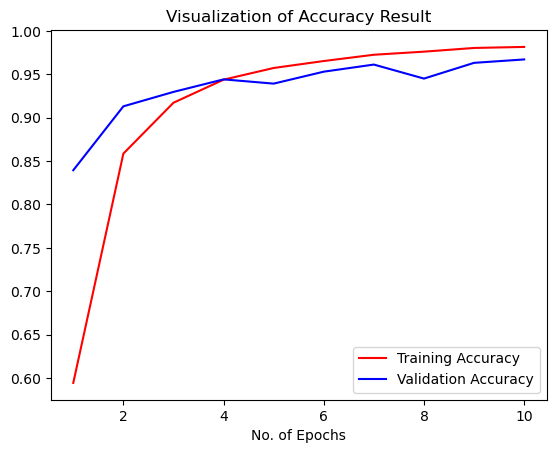

In [76]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# some other matrices for evaluation


In [81]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [83]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [120]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [121]:
y_pred = cnn.predict(test_set)
y_pred

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 285s 16ms/step


array([[9.9999988e-01, 3.3471348e-08, 2.1387747e-11, ..., 1.3603307e-15,
        7.7116793e-15, 3.7964813e-14],
       [9.9999928e-01, 7.2361371e-07, 1.6094959e-11, ..., 6.8785015e-16,
        3.5936860e-14, 1.0498910e-15],
       [1.0000000e+00, 8.4939736e-11, 1.6974948e-12, ..., 3.3928901e-18,
        4.0079137e-16, 1.9003264e-14],
       ...,
       [2.0551154e-08, 3.0149122e-10, 1.6399183e-07, ..., 2.3108573e-08,
        1.4036464e-09, 9.9990940e-01],
       [1.5902291e-08, 5.1030976e-12, 1.7909015e-08, ..., 2.4625149e-09,
        3.4698380e-11, 9.9999774e-01],
       [9.4405635e-18, 4.2614794e-19, 4.8604243e-16, ..., 9.9192852e-18,
        8.5534095e-17, 9.9999905e-01]], dtype=float32)

In [123]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [124]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [130]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[483,   9,   1, ...,   0,   0,   0],
       [  0, 494,   1, ...,   0,   0,   0],
       [  0,   0, 430, ...,   0,   0,   1],
       ...,
       [  0,   0,   1, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 443,   0],
       [  0,   0,   0, ...,   0,   0, 465]], dtype=int64)

In [126]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.97      0.96      0.96       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.94      0.94       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.96      0.

# confusion matrix visualisation


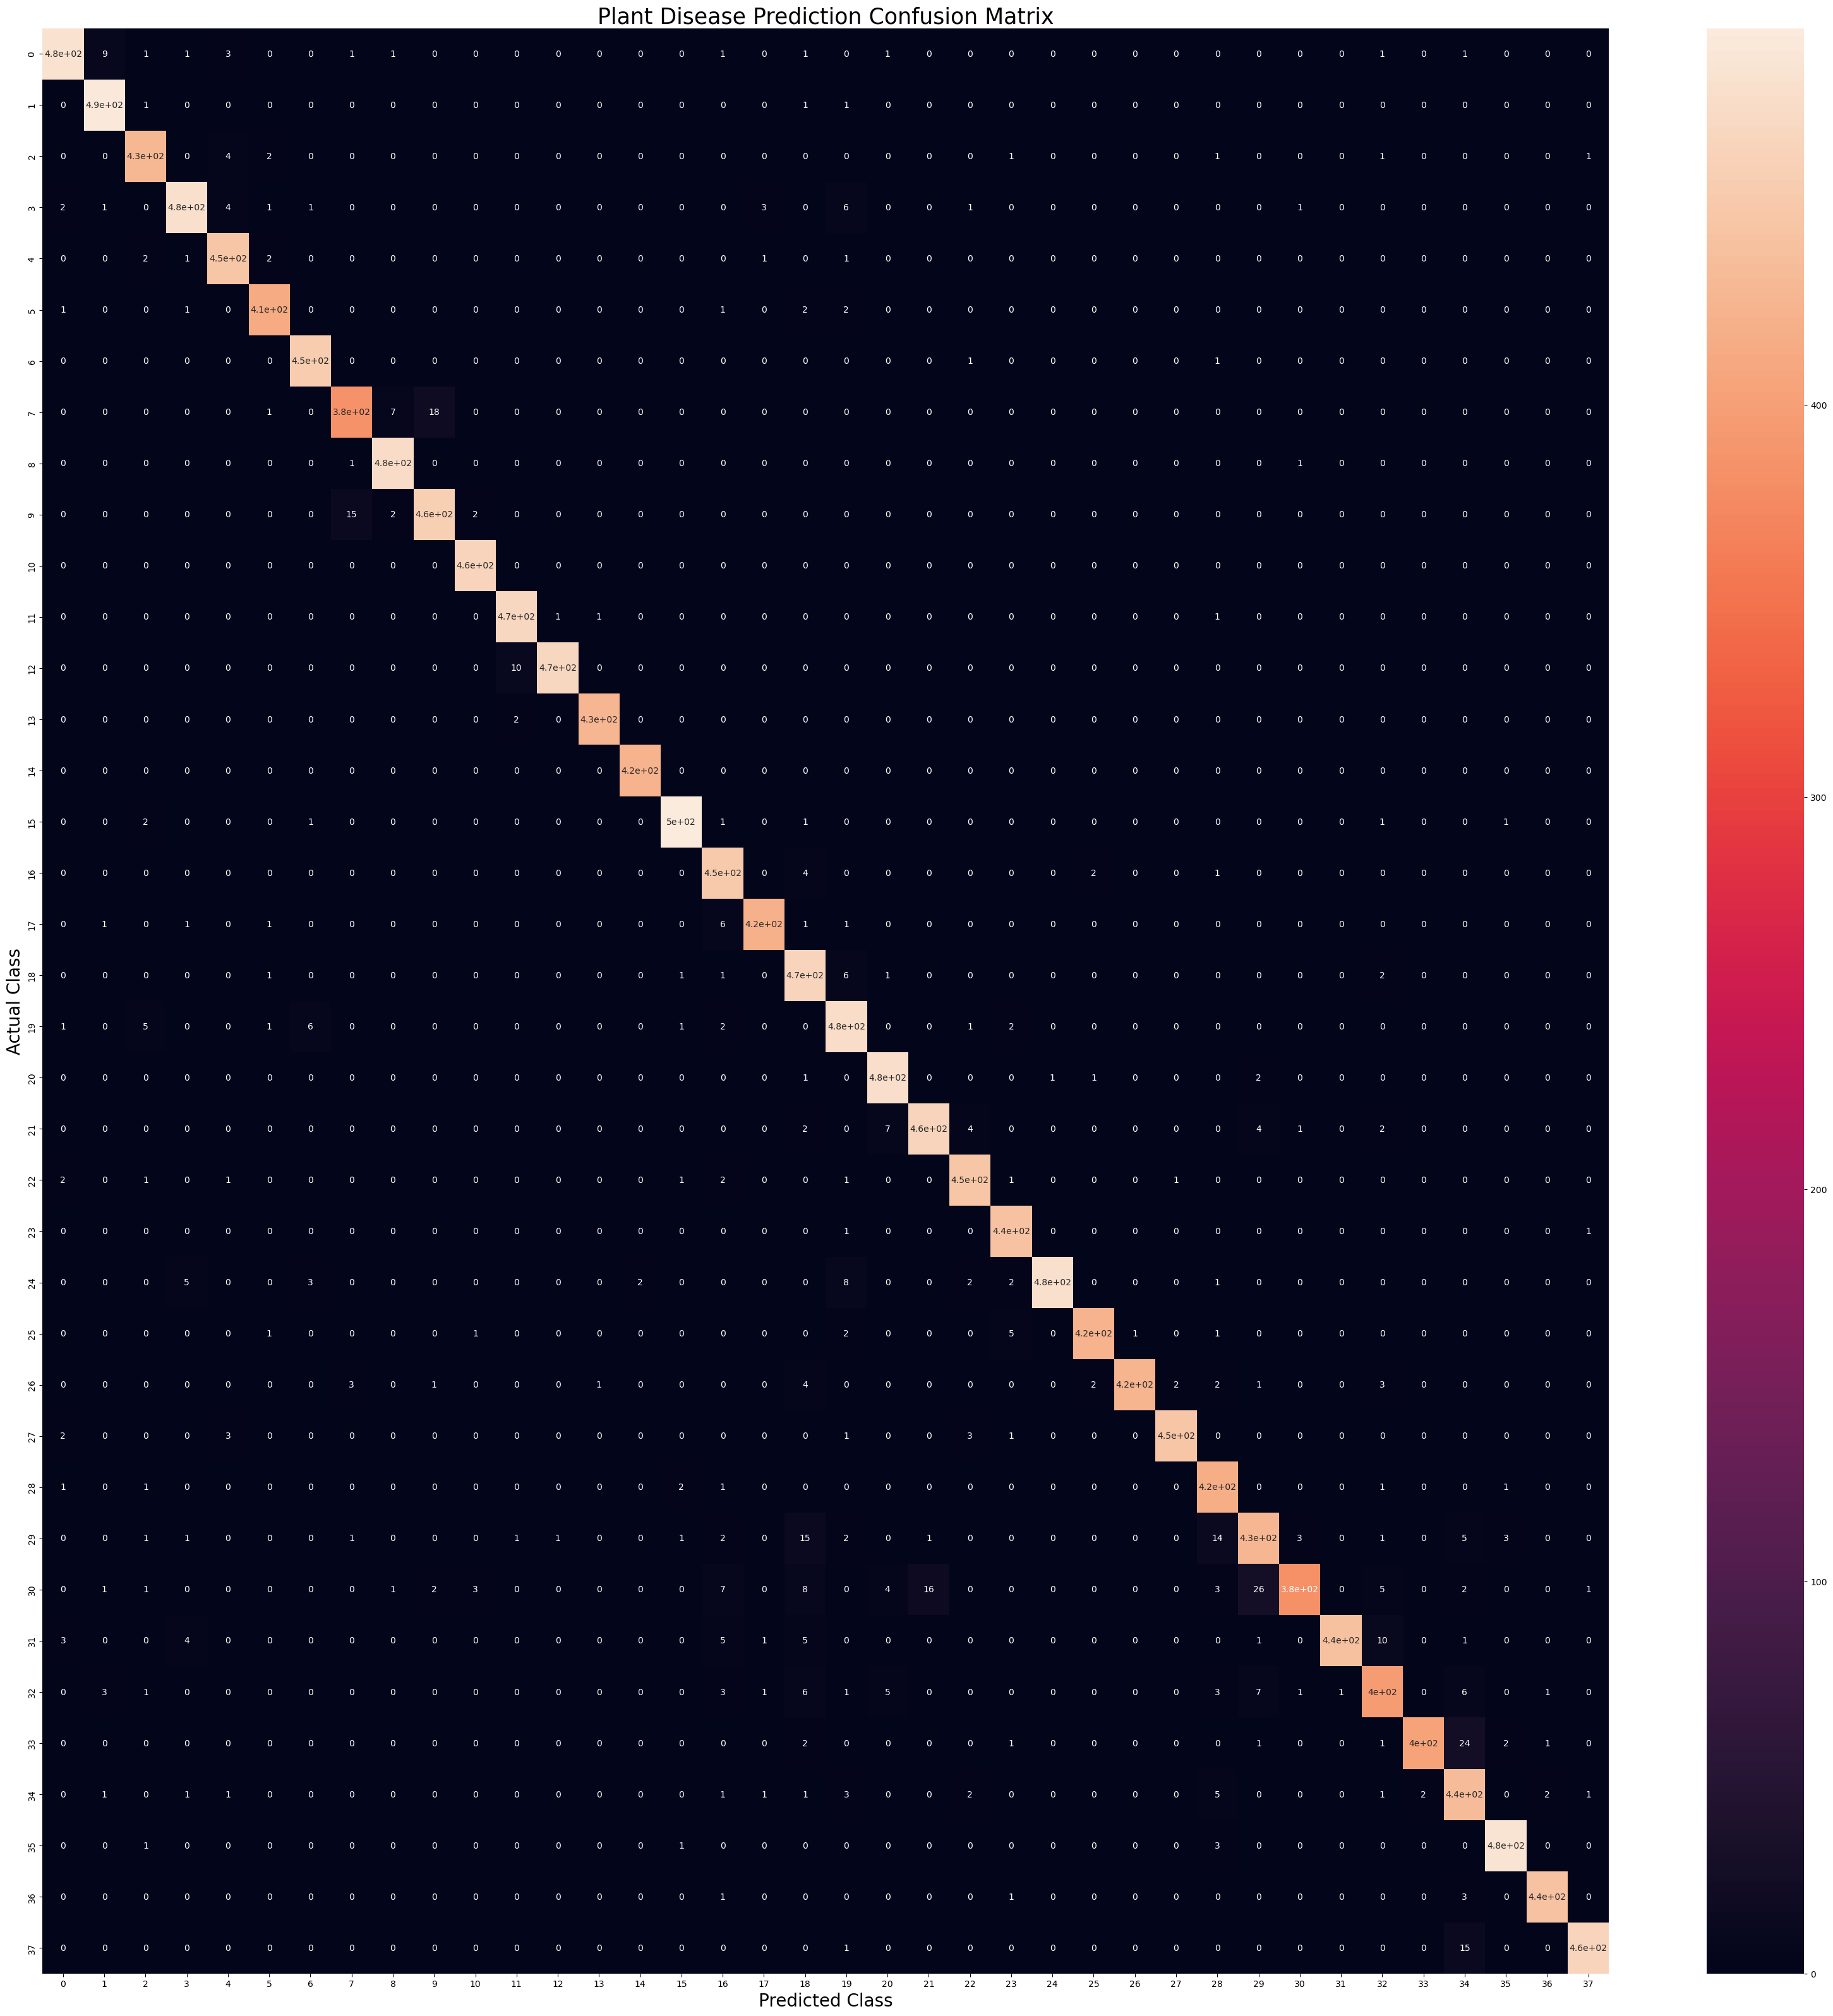

In [128]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()